In [32]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from sklearn.model_selection import train_test_split

In [33]:
# Load the dataset
df = pd.read_csv('../improved_dataset.csv')

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Load English stopwords
english_stopwords = set(stopwords.words("english"))

def preprocess_text(text):
    # Convert text to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove digits and single characters
    text = re.sub(r'\b\w\b|\d+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text and remove stopwords
    words = [word for word in text.split() if word not in english_stopwords]
    
    # Stem the words
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join the stemmed words back into a single string
    processed_text = ' '.join(stemmed_words)
    
    return processed_text

# Apply the preprocess_text function to the "text" column of your DataFrame
df["text"] = df["text"].apply(preprocess_text)


In [36]:
# Split the dataset into features and labels
X = df['text']
y = df['label']

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
X_padded = pad_sequences(X_seq)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [37]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_length = X_padded.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(128))
model.add(Dropout(0.5)) # Adding dropout with a rate of 0.5 (adjust as needed)
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Python310\lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
vocab_size

7823

In [46]:
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9945 - loss: 0.0209 - val_accuracy: 0.7709 - val_loss: 1.1253
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9965 - loss: 0.0091 - val_accuracy: 0.7723 - val_loss: 1.2353
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.7788 - val_loss: 1.1372
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9942 - loss: 0.0207 - val_accuracy: 0.7592 - val_loss: 1.1284
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.9946 - loss: 0.0230 - val_accuracy: 0.7657 - val_loss: 1.0535
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.9970 - loss: 0.0085 - val_accuracy: 0.7788 - val_loss: 1.0977
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.7775 - val_loss: 1.1675
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7984 - loss: 0.7684
Test Accuracy: 0.7814136147499084


In [43]:
# Preprocess the input text
def preprocess_input(text):
    # Tokenize the text
    text_seq = tokenizer.texts_to_sequences([text])
    # Pad sequences to ensure uniform length
    text_padded = pad_sequences(text_seq, maxlen=max_length)
    return text_padded

# Function to make predictions
def predict_sentiment(text):
    # Preprocess the input
    text_padded = preprocess_input(text)
    # Make predictions
    prediction = model.predict(text_padded)
    return prediction[0][0]

# Example usage
text = "I feel more sad"
prediction = predict_sentiment(text)
def classify_stress(prediction, threshold=0.5):
    if prediction >= threshold:
        return str(f"Stressful+{prediction}")
    else:
        return str(f"Not Stressful+{prediction}")

# Example usage
stress_classification = classify_stress(prediction)
print("Classification:", stress_classification)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Classification: Stressful+0.9962118864059448


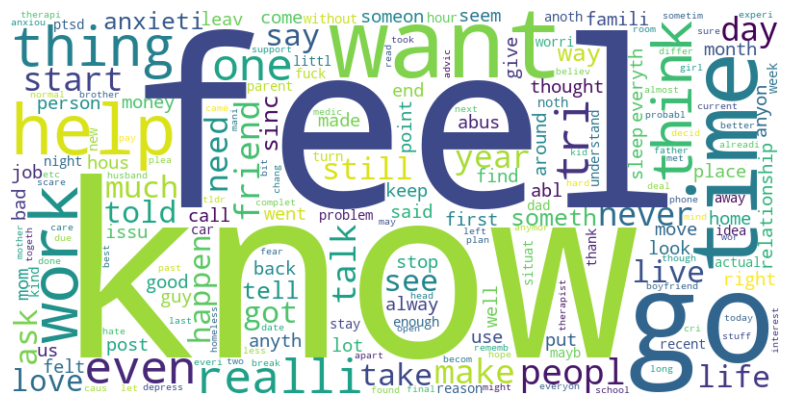

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data in X_train into a single string
text_data = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
